   #  EDA PROJECT ON INSURANCE

## Import all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sb

## Import the data from the system

In [2]:
insurance=pd.read_csv("D:\\python\\EDA_Project\\Insurance.csv")

In [3]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Some helpful Insights of the data

In [4]:
# To get the data types , column details and null values
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Display total rows and columns

np.shape(insurance)

(1338, 7)

## Data cleaning

In [6]:
# check for null values

insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### We do not have any null value or null column in our data

In [47]:
# drop the duplicate data

insurance.drop_duplicates(inplace=True)

np.shape(insurance)

(1337, 7)

#### There is one duplicate value found in our data ,which we removed permanently. 

## summarize the data 

In [8]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Exploratory Data Analysis

## 1. GENDER

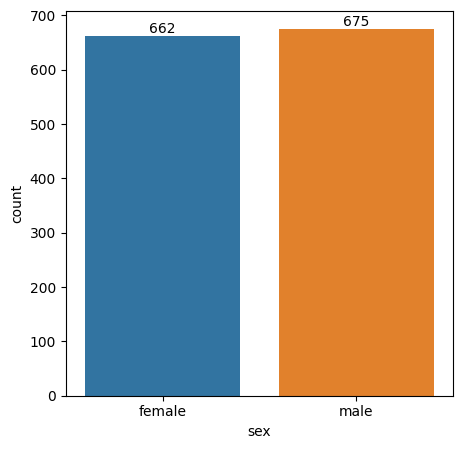

In [95]:
# Difference in Population according to Gender

mp.figure(figsize=(5,5))
gen1=sb.countplot(x="sex",data=insurance)
gen1.bar_label(gen1.containers[0])
mp.show()

### population is almost equal with Males are slightly higher than the Females.
### This concludes that both the genders are well aware with the benefits of having an Insurance.

In [96]:
# Gender wise Insurance charges visualization

gen2=insurance.groupby("sex").agg({"charges" : "mean"}) 
gen2

,charges
sex,
female,12569.578844
male,13974.998864


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


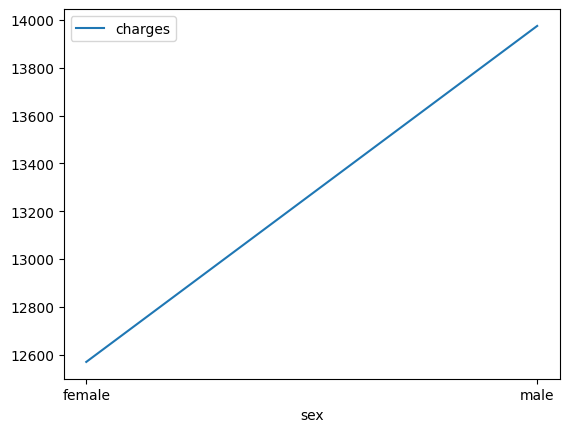

In [97]:
ax=sb.lineplot(gen2)
mp.show()

### Insurance charges are higher for males as compared to females.

# 2. AGE

In [51]:
# Analyze the data according to the age group

group1=insurance.loc[(insurance.age>= 18) & (insurance.age <= 25)].count()
group2=insurance.loc[(insurance.age > 25) & (insurance.age <= 50)].count()
group3=insurance.loc[(insurance.age > 55)].count()

In [52]:
group3

age         216
sex         216
bmi         216
children    216
smoker      216
region      216
charges     216
dtype: int64

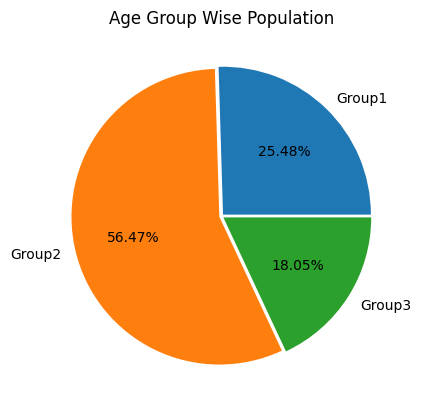

In [120]:
# Visualization of age groups through pie chart

age_group=["Group1","Group2","Group3"]
value=[group1["age"],group2["age"],group3["age"]]
mp.pie(value,labels=age_group,autopct="%1.2f%%",startangle=0,explode=[0.015,0.015,0.015])
mp.title("Age Group Wise Population")
mp.show()

### The mass population belongs to the Working people group(age between 25-50) 

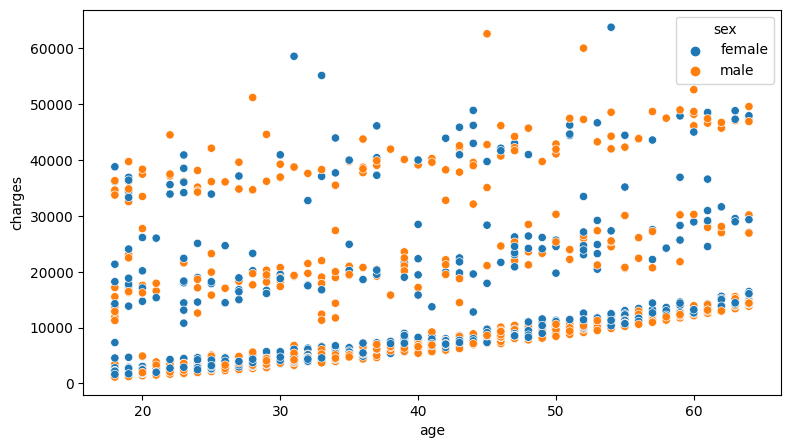

In [17]:
# Check and Analyze corelation between AGE and Insurance charges.

mp.figure(figsize=(9,5))
sb.scatterplot(x="age",y="charges",data=insurance,hue="sex",color=["pink","blue"])
mp.show()

### From the above we can conclude that as the age increases, there is increase in insurance charges also 

## 3. BMI

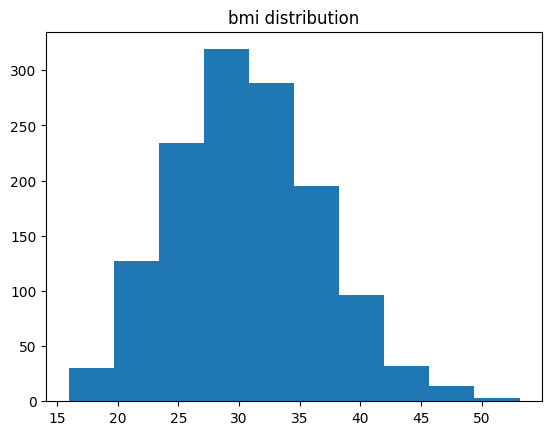

In [21]:
# BMI is body mass index which tells alot about the  physical health of an individual.
# Histogram for bmi distribution

mp.hist(insurance.bmi)
mp.title("bmi distribution")
mp.show()

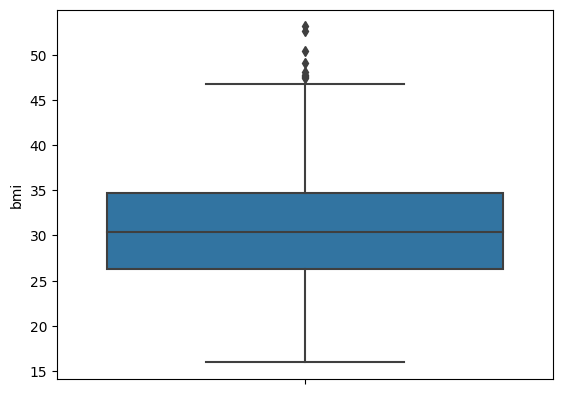

In [23]:
sb.boxplot(y="bmi",data=insurance)
mp.show()

### There are few outliers BUT Majorly BMI lies between (25 to 35) of the insured people.

## 4.CHILDREN

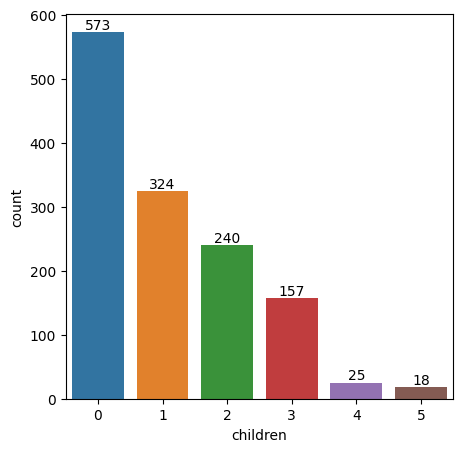

In [57]:
# Children distribution
mp.figure(figsize=(5,5))
child=sb.countplot(x="children",data=insurance)
child.bar_label(child.containers[0])
mp.show()

### Mass population of the insured people belongs to the group having children 2 or less.

# 5. REGION

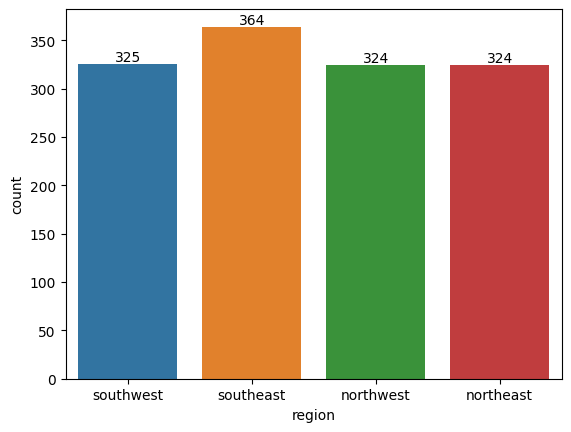

In [65]:
# Check for the region with highest no. of Insured people.

region=sb.countplot(x=insurance.region)
mp.bar_label(region.containers[0])
mp.show()

### All the region are almost equally insured with "southeast" region slightly doing better than others

In [98]:
# Region wise bmi

region1=insurance.groupby("region").agg({"bmi" : "mean"}) 
region1

,bmi
region,
northeast,29.173503
northwest,29.195494
southeast,33.355989
southwest,30.596615


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


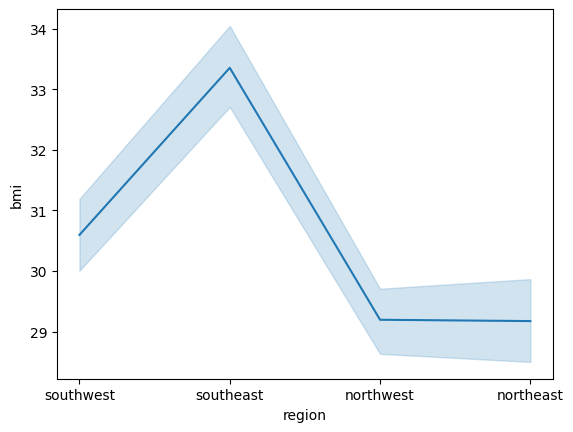

In [93]:
sb.lineplot(x="region",y="bmi",data=insurance)
mp.show()

### SOUTHEAST Region has the Highest BMI While the NORTHEAST(almost Equal to NORTHWEST) Region has the Lowest BMI. 

In [99]:
# Region wise charges

region2=insurance.groupby("region").agg({"charges":"mean"}) 
region2

,charges
region,
northeast,13406.384516
northwest,12450.840844
southeast,14735.411438
southwest,12346.937377


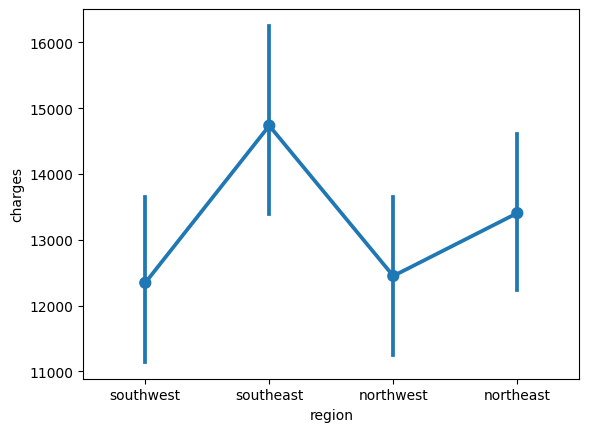

In [80]:
sb.pointplot(x="region",y="charges",data=insurance)
mp.show()

### SOUTHEAST Region has the Highest Average Insurance charge While the SOUTHWEST(almost Equal to NORTHWEST) Region has the Lowest Average Insurance charge.

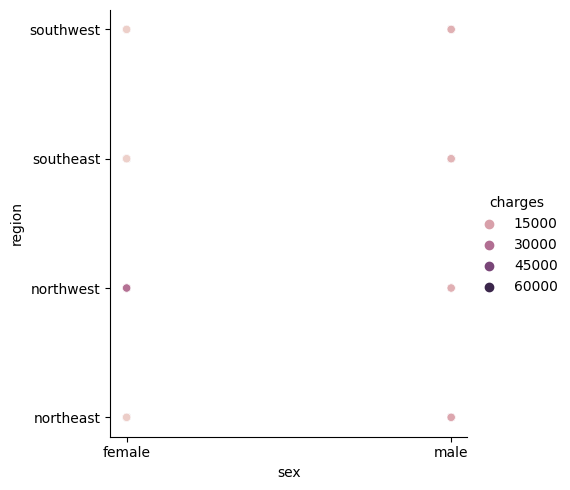

In [72]:
# Gender Wise Regional Insurance charges.

sb.relplot(data=insurance,x="sex",y="region",hue="charges")
mp.show()

### All the Regions has an average insurance charge for both the genders around 15K, except the NORTHWEST Region for Females which has an average charge of insurance around 30K.

# 6. SMOKING HABIT

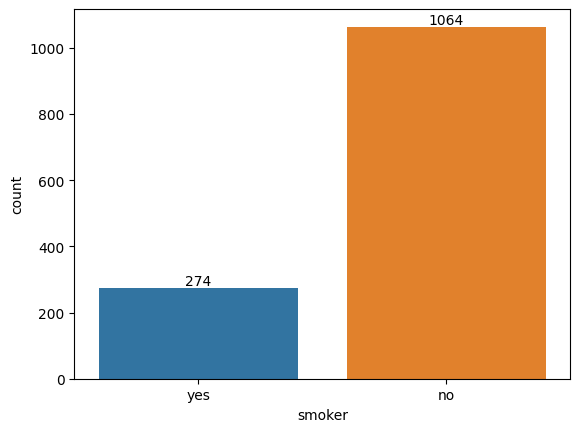

In [27]:
# Total Smoker Count

smoker=sb.countplot(x="smoker",data=insurance)
smoker.bar_label(smoker.containers[0])
mp.show()

### A High number of population belongs to the Non-Smoker group.

In [100]:
# Check for the Insurance charges of both Smoker and Non-Smoker group.

smoker1=insurance.groupby("smoker").agg({"charges" : "mean"}) 
smoker1

,charges
smoker,
no,8440.660307
yes,32050.231832


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


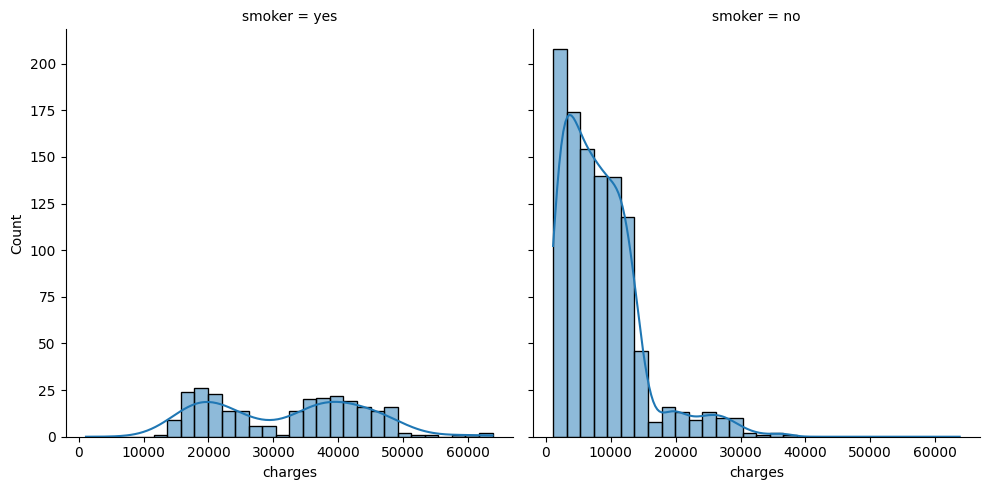

In [30]:
sb.displot(data=insurance, x="charges", col="smoker", kde=True)
mp.show()

### With the help of Analyzation and Visualization we can tell that the Insurance charges are significantly higher for the Smoker group than the Non-Smoker group. 

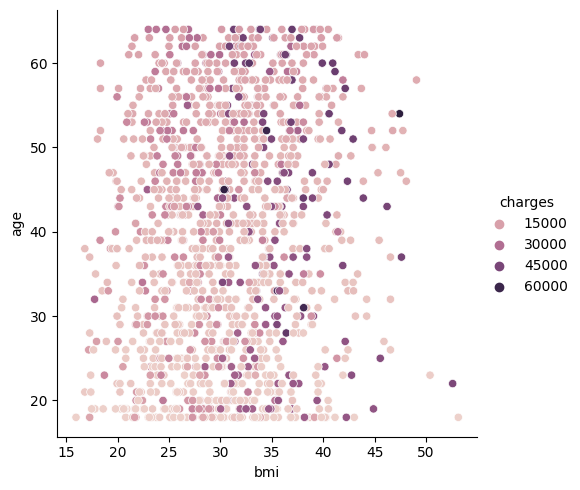

In [33]:
# Visualise the Corelation between BMI, AGE and Insurance Charges.

sb.relplot(data=insurance, x="bmi",y="age",hue="charges")
mp.show()

# CONCLUSION :

### With this Analyzation we can conclude that Insurance charges are Highly depend on the BMI of an Individual.
### 1. Individuals with Age and BMI less than 30 are paying less Insurance premium (close to 15K)
### 2. Individuals with Age greater than 30 but BMI close to 30 are paying Insurance premium relatively High (close to 30K)
### 3. Individuals with Age less than 30 but BMI more than 30 are paying Insurance premium High (close to 45K)
### 4. Individuals with Age and BMI greater than 30 are paying the Highest premium among all (close to 60K)